In [1]:
import pandas as pd
import pyam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import aneris

In [2]:
gnm_path = '../../../data/SOD/model_results/raw/GNM_results_cleaned.xlsx'
chapter_6_path = '../../../data/SOD/model_results/raw/GNM_GEO7_29june2024_27regions_raw.csv'

In [3]:
def round_to_0_1_percent(value):
    if value == 0:
        return 0
    # Determine the number of significant digits to round to
    magnitude = np.floor(np.log10(abs(value))) - 2
    rounding_factor = 10 ** magnitude
    return np.round(value / rounding_factor) * rounding_factor

In [4]:
df_unclean = pd.read_excel(gnm_path)
df_unclean['Scenario'] = df_unclean['Scenario'].replace({'CONS_19': 'LIFE-TP-v2',
                                                   'TECH_19': 'TECH-TP-v2',
                                                   'REF':'REF-v2'
                                                  })
df_unclean['Model'] = df_unclean['Model'].replace({'IMAGE 3.3':'IMAGE-GNM 3.3'})
df_unclean['Unit'] = df_unclean['Unit'].replace({'Mt N/yr':'Mt Nr/yr',
                                                 'mgN/l':'mg N/l',
                                                 'mgP/l':'mg P/l'})
df_unclean['Variable'] = df_unclean['Variable'].str.strip()


ratio_mask = df_unclean['Unit'] == '%'
# Apply rounding to the 'value' column for rows where the 'unit' column is '%'
df_unclean.loc[ratio_mask, df_unclean.columns[5:]] = round(df_unclean.loc[ratio_mask, df_unclean.columns[5:]])

df_unclean.loc[:, df_unclean.columns[5:]] = df_unclean.loc[:, df_unclean.columns[5:]].applymap(round_to_0_1_percent)
df_unclean

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_9632\1150965389.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_unclean.loc[:, df_unclean.columns[5:]] = df_unclean.loc[:, df_unclean.columns[5:]].applymap(round_to_0_1_percent)


,Model,Scenario,Region,Variable,Unit,2000,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
0,IMAGE-GNM 3.3,REF-v2,STAN,Resources|Nitrogen|Cropland Budget|Balance,Mt Nr/yr,0.8870,0.8430,1.1300,1.50000,1.68000,1.62000,1.55000,1.42000,1.29000,1.15000,1.03000
1,IMAGE-GNM 3.3,REF-v2,BRA,Resources|Nitrogen|Cropland Budget|Balance,Mt Nr/yr,1.4200,1.5200,1.3200,0.03360,0.48800,2.05000,2.01000,2.36000,3.22000,3.99000,4.59000
2,IMAGE-GNM 3.3,REF-v2,CAN,Resources|Nitrogen|Cropland Budget|Balance,Mt Nr/yr,1.0800,1.2100,1.3100,1.59000,1.94000,2.12000,2.32000,2.56000,2.83000,3.08000,3.36000
3,IMAGE-GNM 3.3,REF-v2,RCAM,Resources|Nitrogen|Cropland Budget|Balance,Mt Nr/yr,0.8150,0.6830,0.7400,0.82300,0.95500,1.10000,1.15000,1.10000,1.06000,1.01000,0.94100
4,IMAGE-GNM 3.3,REF-v2,CHN,Resources|Nitrogen|Cropland Budget|Balance,Mt Nr/yr,22.4000,27.4000,29.2000,29.20000,18.90000,20.70000,22.80000,24.20000,25.50000,26.70000,28.10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,IMAGE-GNM 3.3,LIFE-TP-v2,TUR,Water Quality|Phosphorus|Export,Mt P/yr,0.0787,0.0795,0.0872,0.08950,0.07070,0.05890,0.06600,0.05790,0.05610,0.04410,0.03700
3443,IMAGE-GNM 3.3,LIFE-TP-v2,UKR,Water Quality|Phosphorus|Export,Mt P/yr,0.0118,0.0122,0.0152,0.00846,0.00683,0.00994,0.00592,0.00857,0.00512,0.00675,0.00577
3444,IMAGE-GNM 3.3,LIFE-TP-v2,USA,Water Quality|Phosphorus|Export,Mt P/yr,0.1630,0.1840,0.1820,0.16300,0.19600,0.12900,0.17000,0.15000,0.11800,0.10300,0.09970
3445,IMAGE-GNM 3.3,LIFE-TP-v2,WAF,Water Quality|Phosphorus|Export,Mt P/yr,0.0768,0.0715,0.0901,0.08500,0.09130,0.09620,0.10700,0.11800,0.13000,0.14000,0.14200


In [5]:
# Sort the DataFrame by the '2050' column in descending order
df_sorted = df_unclean.sort_values(by=2050, ascending=False)

# Remove duplicates based on ['Scenario', 'Region', 'Variable'] and keep the row with the highest '2050' value
df_deduplicated = df_sorted.drop_duplicates(subset=['Scenario', 'Region', 'Variable'], keep='first')
df_clean = pyam.IamDataFrame(df_deduplicated)
df_clean = df_clean.filter(year=[2000, 2010, 2020, 2030, 2040, 2050, 2060])
df_clean.to_excel(('../../../data/SOD/model_results/processed/GNM_results_processed.xlsx'))

In [6]:
df_clean.variable

['Resources|Nitrogen|Cropland Budget|Balance',
 'Resources|Nitrogen|Cropland Budget|Inputs',
 'Resources|Nitrogen|Cropland Budget|Inputs|Atmospheric Deposition',
 'Resources|Nitrogen|Cropland Budget|Inputs|Biological Fixation',
 'Resources|Nitrogen|Cropland Budget|Inputs|Fertilizer',
 'Resources|Nitrogen|Cropland Budget|Inputs|Manure',
 'Resources|Nitrogen|Cropland Budget|Nitrogen Use Efficiency',
 'Resources|Nitrogen|Cropland Budget|Withdrawals',
 'Resources|Nitrogen|Non-Agricultural Land Budget|Inputs|Atmospheric Deposition',
 'Resources|Nitrogen|Non-Agricultural Land Budget|Inputs|Biological Fixation',
 'Resources|Nitrogen|Pasture Budget|Balance',
 'Resources|Nitrogen|Pasture Budget|Inputs',
 'Resources|Nitrogen|Pasture Budget|Inputs|Atmospheric Deposition',
 'Resources|Nitrogen|Pasture Budget|Inputs|Biological Fixation',
 'Resources|Nitrogen|Pasture Budget|Inputs|Fertilizer',
 'Resources|Nitrogen|Pasture Budget|Inputs|Manure',
 'Resources|Nitrogen|Pasture Budget|Withdrawals',
 'Res

In [6]:
def compute_UN_groups(df, variables, weight=None):
    df_africa = df.aggregate_region(variables,
                              region='Africa (UN-R5)',
                              subregions=[
                                    'NAF',
                                    'WAF',
                                    'EAF',
                                    'SAF',
                                    'RSAF',
                              ],
                              weight=weight
                              )

    df_asia = df.aggregate_region(variables,
                              region='Asia and the Pacific (UN-R5)',
                              subregions=[
                                'CHN',
                                'INDIA',
                                'INDO',
                                'JAP',
                                'KOR',
                                'ME',
                                'RSAS',
                                'SEAS',
                                'STAN',
                              ],
                              weight=weight
                              )

    df_ee = df.aggregate_region(variables,
                              region='Eastern Europe (UN-R5)',
                              subregions=[
                                    'CEU',
                                    'RUS',
                                    'UKR',
                              ],
                              weight=weight
                              )

    df_latin = df.aggregate_region(variables,
                              region='Latin America and Caribbean (UN-R5)',
                              subregions=[
                                    'BRA',
                                    'MEX',
                                    'RCAM',
                                    'RSAM',
                              ],
                              weight=weight
                              )

    df_we = df.aggregate_region(variables,
                              region='Western Europe and Other States (UN-R5)',
                              subregions=[
                                        'CAN',
                                        'OCE',
                                        'TUR',
                                        'USA',
                                        'WEU',
                              ],
                              weight=weight
                              )

    df_world = df.filter(region='World', variable=variables)
    
    df_un_groups = pyam.concat([df_africa, df_asia, df_ee, df_latin, df_we, df_world])
    return df_un_groups


In [7]:
weighted_vars = [
    'Water Quality|Nitrogen Concentration',
    'Water Quality|Phosphorus Concentration',
    'Resources|Nitrogen|Cropland Budget|Nitrogen Use Efficiency',
]

abs_variables = [value for value in df_clean.variable if value not in weighted_vars]

df_clean_un_abs = compute_UN_groups(df_clean, abs_variables)
df_clean_un_water = compute_UN_groups(df_clean, ['Water Quality|Nitrogen Concentration','Water Quality|Phosphorus Concentration',], 'Water Quality|Discharge')
df_clean_un_nitrogen = compute_UN_groups(df_clean, ['Resources|Nitrogen|Cropland Budget|Nitrogen Use Efficiency'], 'Resources|Nitrogen|Cropland Budget|Inputs')
df_clean_un = pyam.concat([df_clean_un_abs, df_clean_un_water, df_clean_un_nitrogen])

In [9]:
def plot_data_3_x_3_figures(df, title_dict=None, path_dict=None, variables=None,):

    # Define the color palette for scenarios
    scenario_colors = {
        "REF": "black",
        "LIFE-TP": "orange",
        "TECH-TP": "magenta",
        "REF-v2": "black",
        "LIFE-TP-v2": "orange",
        "TECH-TP-v2": "magenta",
    }

    df_plotting = df.filter(year=[2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]).timeseries().reset_index()
    df_compare_data = pd.melt(df_plotting, id_vars=['model',
                                'scenario',
                                'region',
                                'variable',
                                'unit'
                                    ], var_name='year', value_name='value')
    df_compare_data['year'] = df_compare_data['year'].astype(int)

    if variables is None:
        variables = df.variable

    for variable in variables:
        df_var = df_compare_data[df_compare_data["variable"] == variable]
        # Get unique regions for creating subplots
        unique_regions = df_var['region'].unique()

        # Create subplots based on the number of unique regions
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

        # Initialize lists to store handles and labels for the legend
        legend_handles = []
        legend_labels = []

        # Iterate through each region and plot in respective subplot
        for idx, region in enumerate(unique_regions):
            row_idx = idx // 3
            col_idx = idx % 3
            
            ax = axes[row_idx, col_idx]  # Select the current subplot
            
            region_data = df_var[df_var['region'] == region]  # Filter data for the current region
            
            # Plot lineplots for each region
            lineplot = sns.lineplot(data=region_data, 
                                    x="year", 
                                    y="value", 
                                    hue="scenario", 
                                    # style='model', 
                                    palette=scenario_colors, 
                                    linewidth=2.5, 
                                    ax=ax)
            
            # Customize ticks and labels for the current subplot
            ax.set_ylabel(region_data["unit"].iloc[0], fontsize=14)  # Set the y-axis label to the unit
            # Set y-axis lower limit to 0
            ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
            ax.set_xlabel('', fontsize=1)
            ax.set_title(f"{region}", fontsize=14)  # Set the title to the region
            ax.set_xticks([2010, 2020, 2030, 2040, 2050])
            ax.set_xticklabels([2010, 2020, 2030, 2040, 2050], 
                            rotation=45, fontsize=14)
            
            # Increase fontsize of y-axis tick labels
            ax.tick_params(axis='y', labelsize=14)

            # Add the lineplot to the legend manually
            legend_handles.append(lineplot)
            legend_labels.append(region)
            # Disable the legend for individual subplots
            ax.legend().set_visible(False)
            ax.grid(True)

            # Add a gray background for the 'World' region subplot
            if region == 'World':
                ax.set_facecolor(color='#ededed')

        # Show legend and grid for the current subplot
        if title_dict:
            fig.suptitle(f"{title_dict[variable]}", fontsize=16)
        else:
            fig.suptitle(variable, fontsize=16)

        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.12, 0.55))
        plt.tight_layout()  # Adjust subplots to prevent overlap
        plt.show()
        
        if path_dict:
            root_variable = variable.split("|")[0].replace(" ", "_")
            variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
            # plt.savefig(f"../../../plots/SOD/chpt_20/Regional/{path_dict[variable]}/{variable_name}.png", bbox_inches='tight')
            # plt.close()

In [10]:
def plot_data_individual_figures(df, title_dict=None, path_dict=None, variables=None,):
    # Define the color palette for scenarios
    scenario_colors = {
        "REF": "black",
        "LIFE-TP": "orange",
        "TECH-TP": "magenta",
        "REF-v2": "black",
        "LIFE-TP-v2": "orange",
        "TECH-TP-v2": "magenta",
    }

    regions_dict = {
        'Africa (UN-R5)': 'Africa',
        'Asia and the Pacific (UN-R5)': 'AatP',
        'Eastern Europe (UN-R5)': 'EE',
        'Latin America and Caribbean (UN-R5)': 'LaaC',
        'Western Europe and Other States (UN-R5)': 'WeoS'
                }
    
    if variables is None:
            variables = df.variable

    for region in list(regions_dict.keys()):
        df_plotting = df.filter(year=[2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050], region=region).timeseries().reset_index()

        
        df_selected = df_plotting[df_plotting['variable'].isin(variables)]

        df_compare_data = pd.melt(df_selected, id_vars=['model',
                                    'scenario',
                                    'region',
                                    'variable',
                                    'unit'
                                        ], var_name='year', value_name='value')
        df_compare_data['year'] = df_compare_data['year'].astype(int)

        

        for variable in variables: # ,variables
            # Use Seaborn to create the plot with markers and lines
            data = df_compare_data[df_compare_data["variable"] == variable]

            fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size
            sns.lineplot(
                data=data,
                x="year",
                y="value",
                hue="scenario",
                # style="model",
                dashes=True,
                palette=scenario_colors,
            )

            # Set labels and title
            plt.xlabel("Year")
            plt.ylabel(data["unit"].iloc[0])  # Set the y-axis label to the unit
            # Set y-axis lower limit to 0
            ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
            # Mid point of left and right x-positions
            mid = (fig.subplotpars.right + fig.subplotpars.left)/2
            if title_dict:
                plt.suptitle(title_dict[variable], x=0.4)  # Set the title to the variable
                plt.title(region)
            else:
                fig.suptitle(variable, fontsize=16)
            # Show legend and grid
            plt.legend(title="Legend", bbox_to_anchor=(1.3, 1))
            plt.grid(True)
            # Adjust layout to ensure legend fits within the saved image
            plt.tight_layout()
            # root_variable = variable.split("|")[0].replace(" ", "_")
            if path_dict:
                variable_name = variable.replace(" > 25 μg/m3", "").replace("|", "_").replace(" ", "_").replace("/", "")
                plt.savefig(
                    f"../../../plots/SOD/chpt_20/Regional/{regions_dict[region]}/{path_dict[variable]}/{variable_name}.png"
                )
                plt.show()

In [11]:
df_figures = df_clean_un.copy()
df_figures = df_figures.filter(
    scenario=['REF-v2', 'TECH-TP-v2', 'LIFE-TP-v2'],
    region=[
        'Africa (UN-R5)',
        'Asia and the Pacific (UN-R5)',
        'Eastern Europe (UN-R5)',
        'Latin America and Caribbean (UN-R5)',
        'Western Europe and Other States (UN-R5)',
        'World',],
    model='IMAGE-GNM 3.3'
                    )
df_figures = df_figures.rename(scenario={
    'REF-v2':'REF', 
    'TECH-TP-v2':'TECH-TP', 
    'LIFE-TP-v2':'LIFE-TP'})

In [12]:
#df_figures.filter().to_excel('../../../data/SOD/model_results/to_share/GNM_to_share.xlsx')

In [12]:
path_dict = {
    'Resources|Nitrogen|Cropland Budget|Balance':'Nutrient_Pollution',
    'Resources|Nitrogen|Cropland Budget|Inputs':'Nutrient_Pollution',
    # 'Resources|Nitrogen|Cropland Budget|Inputs|Atmospheric Deposition':'Nutrient_Pollution',
    # 'Resources|Nitrogen|Cropland Budget|Inputs|Biological Fixation':'Nutrient_Pollution',
    # 'Resources|Nitrogen|Cropland Budget|Inputs|Fertilizer':'Nutrient_Pollution',
    # 'Resources|Nitrogen|Cropland Budget|Inputs|Manure':'Nutrient_Pollution',
    'Resources|Nitrogen|Cropland Budget|Nitrogen Use Efficiency':'Nutrient_Pollution',
    'Resources|Nitrogen|Cropland Budget|Withdrawals':'Nutrient_Pollution',
    # 'Resources|Nitrogen|Non-Agricultural Land Budget|Inputs|Atmospheric Deposition':'Nutrient_Pollution',
    # 'Resources|Nitrogen|Non-Agricultural Land Budget|Inputs|Biological Fixation':'Nutrient_Pollution',
    'Resources|Nitrogen|Pasture Budget|Balance':'Nutrient_Pollution',
    'Resources|Nitrogen|Pasture Budget|Inputs':'Nutrient_Pollution',
    # 'Resources|Nitrogen|Pasture Budget|Inputs|Atmospheric Deposition':'Nutrient_Pollution',
    # 'Resources|Nitrogen|Pasture Budget|Inputs|Biological Fixation':'Nutrient_Pollution',
    # 'Resources|Nitrogen|Pasture Budget|Inputs|Fertilizer':'Nutrient_Pollution',
    # 'Resources|Nitrogen|Pasture Budget|Inputs|Manure':'Nutrient_Pollution',
    'Resources|Nitrogen|Pasture Budget|Withdrawals':'Nutrient_Pollution',
    'Resources|Phosphorus|Cropland Budget|Balance':'Nutrient_Pollution',
    'Resources|Phosphorus|Cropland Budget|Inputs':'Nutrient_Pollution',
    # 'Resources|Phosphorus|Cropland Budget|Inputs|Fertilizer':'Nutrient_Pollution',
    # 'Resources|Phosphorus|Cropland Budget|Inputs|Manure Recycled from Confinements':'Nutrient_Pollution',
    'Resources|Phosphorus|Cropland Budget|Withdrawals':'Nutrient_Pollution',
    'Resources|Phosphorus|Pasture Budget|Balance':'Nutrient_Pollution',
    'Resources|Phosphorus|Pasture Budget|Inputs':'Nutrient_Pollution',
    # 'Resources|Phosphorus|Pasture Budget|Inputs|Fertilizer':'Nutrient_Pollution',
    # 'Resources|Phosphorus|Pasture Budget|Inputs|Manure':'Nutrient_Pollution',
    'Resources|Phosphorus|Pasture Budget|Withdrawals':'Nutrient_Pollution',
    'Water Quality|Discharge':'Nutrient_Pollution',
    'Water Quality|Nitrogen Concentration':'Nutrient_Pollution',
    # 'Water Quality|Nitrogen|Delivery':'Nutrient_Pollution',
    # 'Water Quality|Nitrogen|Delivery|Agriculture':'Nutrient_Pollution',
    # 'Water Quality|Nitrogen|Delivery|Aquaculture':'Nutrient_Pollution',
    # 'Water Quality|Nitrogen|Delivery|Natural':'Nutrient_Pollution',
    # 'Water Quality|Nitrogen|Delivery|Pointsources':'Nutrient_Pollution',
    # 'Water Quality|Nitrogen|Export':'Nutrient_Pollution',
    'Water Quality|Phosphorus Concentration':'Nutrient_Pollution',
    # 'Water Quality|Phosphorus|Delivery':'Nutrient_Pollution',
    # 'Water Quality|Phosphorus|Delivery|Agriculture':'Nutrient_Pollution',
    # 'Water Quality|Phosphorus|Delivery|Aquaculture':'Nutrient_Pollution',
    # 'Water Quality|Phosphorus|Delivery|Natural':'Nutrient_Pollution',
    # 'Water Quality|Phosphorus|Delivery|Pointsources':'Nutrient_Pollution',
    # 'Water Quality|Phosphorus|Export':'Nutrient_Pollution'
    }

title_dict = {}


df_figures.filter(variable=path_dict.keys()).to_excel('../../../data/SOD/model_results/to_share/GNM_to_share.xlsx')

In [13]:
inputs_vars = [
    'Resources|Nitrogen|Cropland Budget|Inputs', 
    'Resources|Nitrogen|Pasture Budget|Inputs', 
    'Resources|Phosphorus|Cropland Budget|Inputs', 
    'Resources|Phosphorus|Pasture Budget|Inputs',
               ]

df_test = df_figures.filter(
            variable=[
            'Resources|Nitrogen|Cropland Budget|Balance', 
            'Resources|Nitrogen|Cropland Budget|Inputs|*', 
            'Resources|Nitrogen|Cropland Budget|Withdrawals',],
            region='World',
            scenario='REF')
df_test.timeseries()

2000  \
model         scenario region variable                                           unit             
IMAGE-GNM 3.3 REF      World  Resources|Nitrogen|Cropland Budget|Balance         Mt Nr/yr  79.6   
                              Resources|Nitrogen|Cropland Budget|Inputs|Atmos... Mt Nr/yr  13.3   
                              Resources|Nitrogen|Cropland Budget|Inputs|Biolo... Mt Nr/yr  23.9   
                              Resources|Nitrogen|Cropland Budget|Inputs|Ferti... Mt Nr/yr  76.5   
                              Resources|Nitrogen|Cropland Budget|Inputs|Manure   Mt Nr/yr  30.0   
                              Resources|Nitrogen|Cropland Budget|Withdrawals     Mt Nr/yr  64.1   

                                                                                           2010  \
model         scenario region variable                                           unit             
IMAGE-GNM 3.3 REF      World  Resources|Nitrogen|Cropland Budget|Balance         Mt Nr/yr  91.7   
                              Resources|Nitrogen|Cropland Budget|Inputs|Atmos... Mt Nr/yr  14.9   
                              Resources|Nitrogen|Cropland Budget|Inputs|Biolo... Mt Nr/yr  27.9   
                              Resources|Nitrogen|Cropland Budget|Inputs|Ferti... Mt Nr/yr  96.4   
                              Resources|Nitrogen|Cropland Budget|Inputs|Manure   Mt Nr/yr  33.6   
                              Resources|Nitrogen|Cropland Budget|Withdrawals     Mt Nr/yr  81.1   

                                                                                            2020  \
model         scenario region variable                                           unit              
IMAGE-GNM 3.3 REF      World  Resources|Nitrogen|Cropland Budget|Balance         Mt Nr/yr   90.5   
                              Resources|Nitrogen|Cropland Budget|Inputs|Atmos... Mt Nr/yr   15.3   
                              Resources|Nitrogen|Cropland Budget|Inputs|Biolo... Mt Nr/yr   34.1   
                              Resources|Nitrogen|Cropland Budget|Inputs|Ferti... Mt Nr/yr  104.0   
                              Resources|Nitrogen|Cropland Budget|Inputs|Manure   Mt Nr/yr   38.5   
                              Resources|Nitrogen|Cropland Budget|Withdrawals     Mt Nr/yr  102.0   

                                                                                            2030  \
model         scenario region variable                                           unit              
IMAGE-GNM 3.3 REF      World  Resources|Nitrogen|Cropland Budget|Balance         Mt Nr/yr  108.0   
                              Resources|Nitrogen|Cropland Budget|Inputs|Atmos... Mt Nr/yr   17.1   
                              Resources|Nitrogen|Cropland Budget|Inputs|Biolo... Mt Nr/yr   36.8   
                              Resources|Nitrogen|Cropland Budget|Inputs|Ferti... Mt Nr/yr  126.0   
                              Resources|Nitrogen|Cropland Budget|Inputs|Manure   Mt Nr/yr   42.2   
                              Resources|Nitrogen|Cropland Budget|Withdrawals     Mt Nr/yr  114.0   

                                                                                            2040  \
model         scenario region variable                                           unit              
IMAGE-GNM 3.3 REF      World  Resources|Nitrogen|Cropland Budget|Balance         Mt Nr/yr  122.0   
                              Resources|Nitrogen|Cropland Budget|Inputs|Atmos... Mt Nr/yr   18.8   
                              Resources|Nitrogen|Cropland Budget|Inputs|Biolo... Mt Nr/yr   39.3   
                              Resources|Nitrogen|Cropland Budget|Inputs|Ferti... Mt Nr/yr  144.0   
                              Resources|Nitrogen|Cropland Budget|Inputs|Manure   Mt Nr/yr   44.5   
                              Resources|Nitrogen|Cropland Budget|Withdrawals     Mt Nr/yr  125.0   

                                                                                            2050  
mod

In [14]:
df_withdrawal = df_test.multiply('Resources|Nitrogen|Cropland Budget|Withdrawals', -1, 'Resources|Nitrogen|Cropland Budget|Withdrawals', ignore_units='Mt Nr/yr')
df_inputs = df_test.filter(variable='Resources|Nitrogen|Cropland Budget|Inputs*')
df_all = pyam.concat([df_withdrawal, df_inputs])

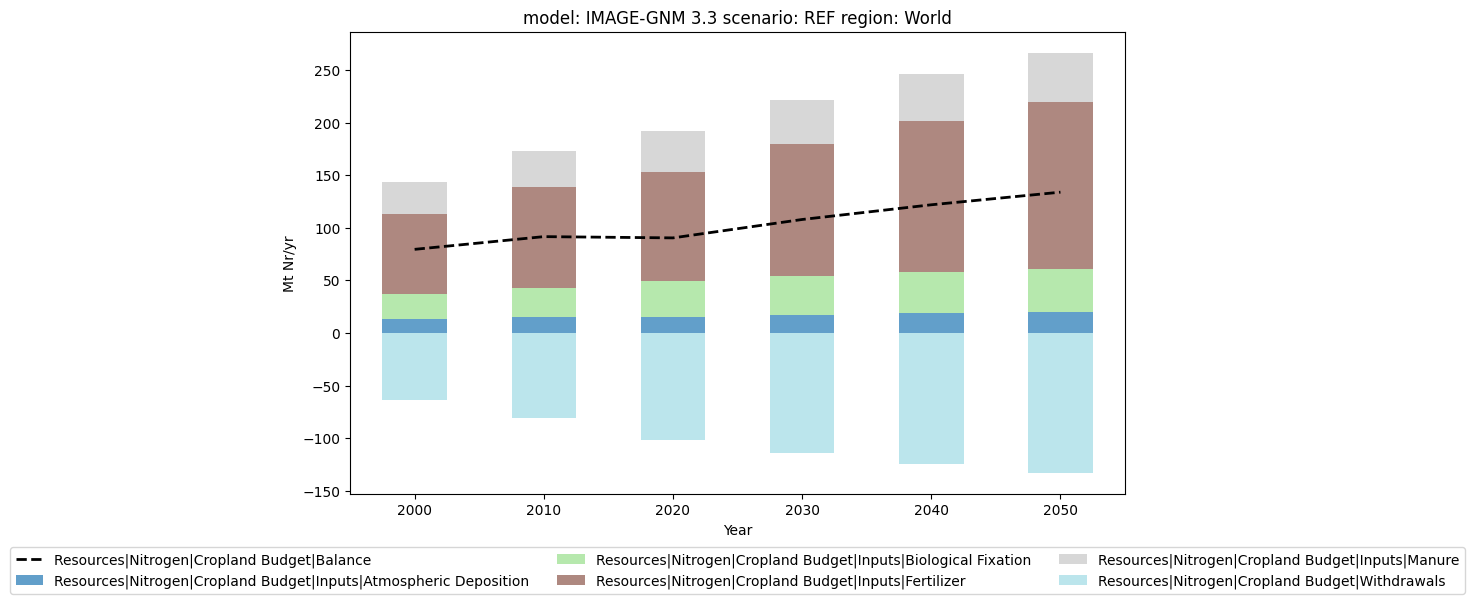

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
df_all.plot.bar(
    alpha=0.7,
    x='year', 
    bars="variable", 
    cmap="tab20",
    stacked=True,
    ax=ax
    # total={'label':'Resources|Nitrogen|Cropland Budget|Balance', 'lw':'2'}
    )
df_balance = df_test.filter(variable='Resources|Nitrogen|Cropland Budget|Balance').data

df_balance['value'].plot(style='--', c='black', ax=ax, linewidth=2, label='Resources|Nitrogen|Cropland Budget|Balance')


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Chapter 6 specific request

In [16]:
df_unclean = pd.read_csv(chapter_6_path, delimiter=';')
df_unclean['Scenario'] = df_unclean['Scenario'].replace({'CONS_19': 'LIFE-TP-v2',
                                                   'TECH_19': 'TECH-TP-v2',
                                                   'REF':'REF-v2'
                                                  })
df_unclean['Model'] = df_unclean['Model'].replace({'IMAGE 3.3':'IMAGE-GNM 3.3'})
df_unclean['Unit'] = df_unclean['Unit'].replace({'Mt N/yr':'Mt Nr/yr',
                                                 'mgN/l':'mg N/l',
                                                 'mgP/l':'mg P/l'})
df_unclean['Variable'] = df_unclean['Variable'].str.strip()


ratio_mask = df_unclean['Unit'] == '%'
# Apply rounding to the 'value' column for rows where the 'unit' column is '%'
df_unclean.loc[ratio_mask, df_unclean.columns[5:]] = round(df_unclean.loc[ratio_mask, df_unclean.columns[5:]])

df_unclean.loc[:, df_unclean.columns[5:]] = df_unclean.loc[:, df_unclean.columns[5:]].applymap(round_to_0_1_percent)
df_unclean

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_9632\4052779354.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_unclean.loc[:, df_unclean.columns[5:]] = df_unclean.loc[:, df_unclean.columns[5:]].applymap(round_to_0_1_percent)


,Model,Scenario,Region,Variable,Unit,1970,1975,1980,1985,1990,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,IMAGE-GNM 3.3,REF-v2,STAN,Resources|Nitrogen|Cropland Budget|Balance,Mt Nr/yr,0.7110,1.1200,1.2600,1.6800,1.2600,...,1.05000,1.07000,1.08000,1.1000,1.12000,1.14000,1.16000,1.18000,1.19000,1.20000
1,IMAGE-GNM 3.3,REF-v2,BRA,Resources|Nitrogen|Cropland Budget|Balance,Mt Nr/yr,0.6570,0.6700,1.2400,1.1700,1.0200,...,4.50000,4.56000,4.62000,4.7000,4.75000,4.79000,4.79000,4.78000,4.79000,4.82000
2,IMAGE-GNM 3.3,REF-v2,CAN,Resources|Nitrogen|Cropland Budget|Balance,Mt Nr/yr,0.0418,0.2640,0.5210,0.7410,0.6810,...,3.47000,3.58000,3.70000,3.8200,3.94000,4.06000,4.16000,4.27000,4.40000,4.52000
3,IMAGE-GNM 3.3,REF-v2,RCAM,Resources|Nitrogen|Cropland Budget|Balance,Mt Nr/yr,0.6870,0.5890,0.7290,0.7840,0.7970,...,0.95100,0.97700,1.00000,1.0300,1.06000,1.08000,1.10000,1.11000,1.12000,1.13000
4,IMAGE-GNM 3.3,REF-v2,CHN,Resources|Nitrogen|Cropland Budget|Balance,Mt Nr/yr,2.7900,3.8900,10.5000,12.0000,18.1000,...,27.90000,27.70000,27.50000,27.2000,26.90000,26.50000,26.00000,25.50000,24.90000,24.30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,IMAGE-GNM 3.3,LIFE-TP-v2,TUR,Water Quality|Phosphorus|Export,Mt P/yr,0.0655,0.0702,0.0858,0.0764,0.0730,...,0.02620,0.03030,0.02780,0.0294,0.02000,0.03110,0.02450,0.03250,0.03200,0.03080
3443,IMAGE-GNM 3.3,LIFE-TP-v2,UKR,Water Quality|Phosphorus|Export,Mt P/yr,0.0211,0.0130,0.0223,0.0185,0.0145,...,0.00432,0.00266,0.00765,0.0040,0.00493,0.00393,0.00371,0.00438,0.00408,0.00502
3444,IMAGE-GNM 3.3,LIFE-TP-v2,USA,Water Quality|Phosphorus|Export,Mt P/yr,0.2160,0.2380,0.2110,0.2020,0.1790,...,0.09970,0.10700,0.10200,0.1120,0.11300,0.10300,0.08950,0.09640,0.09890,0.10400
3445,IMAGE-GNM 3.3,LIFE-TP-v2,WAF,Water Quality|Phosphorus|Export,Mt P/yr,0.0759,0.0698,0.0694,0.0668,0.0687,...,0.14000,0.16200,0.14100,0.1310,0.11300,0.11400,0.10300,0.09320,0.08840,0.09460


In [17]:
# Sort the DataFrame by the '2050' column in descending order
df_sorted = df_unclean.sort_values(by='2050', ascending=False)

# Remove duplicates based on ['Scenario', 'Region', 'Variable'] and keep the row with the highest '2050' value
df_deduplicated = df_sorted.drop_duplicates(subset=['Scenario', 'Region', 'Variable'], keep='first')
df_clean = pyam.IamDataFrame(df_deduplicated)
df_clean = df_clean.filter(year=[
    1970,
    1975,
    1980,
    1985,
    1990,
    1995,
    2000,
    2005,
    2010,
    2015,
    2020,],
    variable=[
        'Water Quality|Nitrogen Concentration',
        'Water Quality|Phosphorus Concentration',
        'Water Quality|Discharge'
    ],
    scenario='REF-v2')
df_clean.timeseries()

1970  \
model         scenario region variable                               unit                 
IMAGE-GNM 3.3 REF-v2   BRA    Water Quality|Discharge                km3/yr   5350.0000   
                              Water Quality|Nitrogen Concentration   mg N/l      0.4810   
                              Water Quality|Phosphorus Concentration mg P/l      0.0374   
                       CAN    Water Quality|Discharge                km3/yr   2380.0000   
                              Water Quality|Nitrogen Concentration   mg N/l      0.1860   
...                                                                                 ...   
                       WEU    Water Quality|Nitrogen Concentration   mg N/l      2.7100   
                              Water Quality|Phosphorus Concentration mg P/l      0.3800   
                       World  Water Quality|Discharge                km3/yr  38200.0000   
                              Water Quality|Nitrogen Concentration   mg N/l      0.6660   
                              Water Quality|Phosphorus Concentration mg P/l      0.0880   

                                                                                   1975  \
model         scenario region variable                               unit                 
IMAGE-GNM 3.3 REF-v2   BRA    Water Quality|Discharge                km3/yr   6970.0000   
                              Water Quality|Nitrogen Concentration   mg N/l      0.4750   
                              Water Quality|Phosphorus Concentration mg P/l      0.0385   
                       CAN    Water Quality|Discharge                km3/yr   2530.0000   
                              Water Quality|Nitrogen Concentration   mg N/l      0.1850   
...                                                                                 ...   
                       WEU    Water Quality|Nitrogen Concentration   mg N/l      2.7500   
                              Water Quality|Phosphorus Concentration mg P/l      0.3480   
                       World  Water Quality|Discharge                km3/yr  40800.0000   
                              Water Quality|Nitrogen Concentration   mg N/l      0.6900   
                              Water Quality|Phosphorus Concentration mg P/l      0.0884   

                                                                                   1980  \
model         scenario region variable                               unit                 
IMAGE-GNM 3.3 REF-v2   BRA    Water Quality|Discharge                km3/yr   5800.0000   
                              Water Quality|Nitrogen Concentration   mg N/l      0.4840   
                              Water Quality|Phosphorus Concentration mg P/l      0.0381   
                       CAN    Water Quality|Discharge                km3/yr   2630.0000   
                              Water Quality|Nitrogen Concentration   mg N/l      0.1900   
...                                                                                 ...   
                       WEU    Water Quality|Nitrogen Concentration   mg N/l      3.0800   
                              Water Quality|Phosphorus Concentration mg P/l      0.3540   
                       World  Water Quality|Discharge                km3/yr  38700.0000   
                              Water Quality|Nitrogen Concentration   mg N/l      0.8000   
                              Water Quality|Phosphorus Concentration mg P/l      0.0944   

                                                                                   1985  \
model         scenario region variable                               unit                 
IMAGE-GNM 3.3 REF-v2   BRA    Water Quality|Discharge                km3/yr   6760.0000   
                              Water Quality|Nitrogen Concentration   mg N/l      0.4820   
                              Water Quality|Phosphorus Concentration mg P/l      0.0382   
                       CAN    Water Quality|Discharge                km3/yr 

In [19]:
df_un = compute_UN_groups(df_clean, ['Water Quality|Nitrogen Concentration','Water Quality|Phosphorus Concentration'], 'Water Quality|Discharge')
df_un.rename(model={'IMAGE-GNM 3.3':'Nutrient_Pollution'}, scenario={'REF-v2':'REF'}, inplace=True)
df_un.to_excel(('../../../data/SOD/model_results/to_share/GNM_to_share_chapter_6.xlsx'))
df_un.timeseries()

1970  \
model              scenario region                                  variable                               unit               
Nutrient_Pollution REF      Africa (UN-R5)                          Water Quality|Nitrogen Concentration   mg N/l  0.350696   
                                                                    Water Quality|Phosphorus Concentration mg P/l  0.048973   
                            Asia and the Pacific (UN-R5)            Water Quality|Nitrogen Concentration   mg N/l  0.649735   
                                                                    Water Quality|Phosphorus Concentration mg P/l  0.098915   
                            Eastern Europe (UN-R5)                  Water Quality|Nitrogen Concentration   mg N/l  0.888017   
                                                                    Water Quality|Phosphorus Concentration mg P/l  0.099664   
                            Latin America and Caribbean (UN-R5)     Water Quality|Nitrogen Concentration   mg N/l  0.479792   
                                                                    Water Quality|Phosphorus Concentration mg P/l  0.057941   
                            Western Europe and Other States (UN-R5) Water Quality|Nitrogen Concentration   mg N/l  1.057013   
                                                                    Water Quality|Phosphorus Concentration mg P/l  0.136039   
                            World                                   Water Quality|Nitrogen Concentration   mg N/l  0.666000   
                                                                    Water Quality|Phosphorus Concentration mg P/l  0.088000   

                                                                                                                       1975  \
model              scenario region                                  variable                               unit               
Nutrient_Pollution REF      Africa (UN-R5)                          Water Quality|Nitrogen Concentration   mg N/l  0.376713   
                                                                    Water Quality|Phosphorus Concentration mg P/l  0.050867   
                            Asia and the Pacific (UN-R5)            Water Quality|Nitrogen Concentration   mg N/l  0.726878   
                                                                    Water Quality|Phosphorus Concentration mg P/l  0.114198   
                            Eastern Europe (UN-R5)                  Water Quality|Nitrogen Concentration   mg N/l  0.836520   
                                                                    Water Quality|Phosphorus Concentration mg P/l  0.092820   
                            Latin America and Caribbean (UN-R5)     Water Quality|Nitrogen Concentration   mg N/l  0.487600   
                                                                    Water Quality|Phosphorus Concentration mg P/l  0.057398   
                            Western Europe and Other States (UN-R5) Water Quality|Nitrogen Concentration   mg N/l  1.060451   
                                                                    Water Quality|Phosphorus Concentration mg P/l  0.118442   
                            World                                   Water Quality|Nitrogen Concentration   mg N/l  0.690000   
                                                                    Water Quality|Phosphorus Concentration mg P/l  0.088400   

                                                                                                                       1980  \
model              scenario region                                  variable                               unit               
Nutrient_Pollution REF      Africa (UN-R5)                          Water Quality|Nitrogen Concentration   mg N/l  0.378991   
                                                                    Water Quality|Phosphorus Concentration mg P/l  0.049623   
                            Asia and the Pacific (UN-